<a href="https://www.kaggle.com/code/udaykanchanpally/pgs5e8-eda-analaysis?scriptVersionId=257370917" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:

# Required Modules and functions 
import pandas as pd 
import numpy as np
import seaborn as sn 
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
from sklearn.preprocessing import LabelEncoder
print("modules loaded")


modules loaded


In [2]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e8/sample_submission.csv
/kaggle/input/playground-series-s5e8/train.csv
/kaggle/input/playground-series-s5e8/test.csv



## 🎯 Your Goal


Your goal is to **predict whether a client will subscribe to a bank term deposit** based on the features provided in the dataset.

## 📈 Evaluation

Submissions are evaluated using the **ROC AUC (Receiver Operating Characteristic - Area Under the Curve)** between the predicted values and the observed target.

A higher AUC indicates a better model performance.

# 📈 What is ROC AUC?

**ROC AUC** stands for **Receiver Operating Characteristic - Area Under the Curve**.  
It is a metric used to evaluate the performance of a **binary classification model**.


### ✅ In This Competition

You are predicting whether a client will **subscribe to a bank term deposit** (`yes` or `no`).  
Your model outputs a **probability** (e.g., 0.87) rather than a hard class label.



### 📊 What Does ROC AUC Measure?

ROC AUC measures how well your model **distinguishes between the two classes**:

- Clients who **did subscribe**
- Clients who **did not subscribe**

It evaluates the model’s ability to **rank** positive cases higher than negative ones.


### 🎯 Interpretation:

- **AUC = 1.0** → Perfect classification  
- **AUC = 0.5** → Random guessing  
- **AUC < 0.5** → Worse than random



### ⚖️ Why Use ROC AUC?

ROC AUC is especially useful when classes are **imbalanced** (e.g., 90% didn't subscribe, 10% did).  
It doesn't depend on a specific threshold and focuses on how well the model **ranks predictions**.

---



In [3]:
sample_submission = pd.read_csv("/kaggle/input/playground-series-s5e8/sample_submission.csv")
train = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

In [4]:
sample_submission 

,id,y
0,750000,0.5
1,750001,0.5
2,750002,0.5
3,750003,0.5
4,750004,0.5
...,...,...
249995,999995,0.5
249996,999996,0.5
249997,999997,0.5
249998,999998,0.5


# DataFrames


In [5]:
train = pd.read_csv("/kaggle/input/playground-series-s5e8/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e8/test.csv")

In [6]:
train

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


# MISSING VAUES 


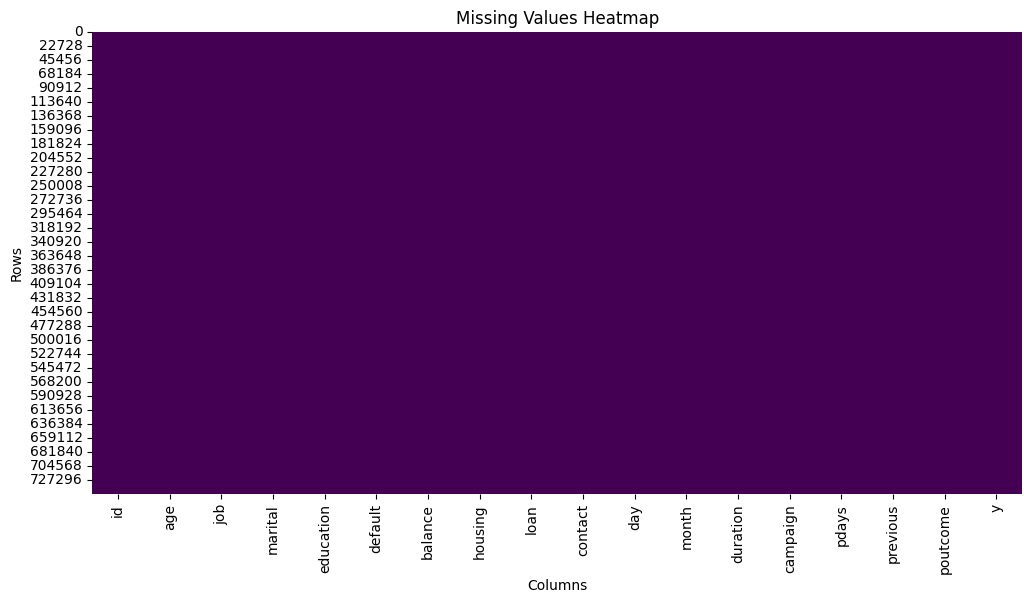

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()


# Datatypes

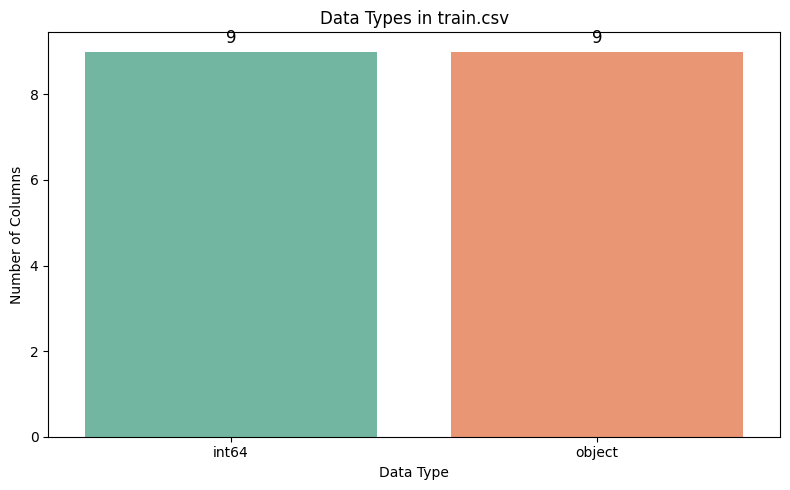

int64     9
object    9
Name: count, dtype: int64

In [9]:

# Count data types
dtype_counts = train.dtypes.value_counts()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=dtype_counts.index.astype(str), y=dtype_counts.values, palette='Set2')

# Add labels
for i, val in enumerate(dtype_counts.values):
    plt.text(i, val + 0.1, str(val), ha='center', va='bottom', fontsize=12)

plt.title("Data Types in train.csv")
plt.xlabel("Data Type")
plt.ylabel("Number of Columns")
plt.tight_layout()
plt.show()

dtype_counts

# Null values

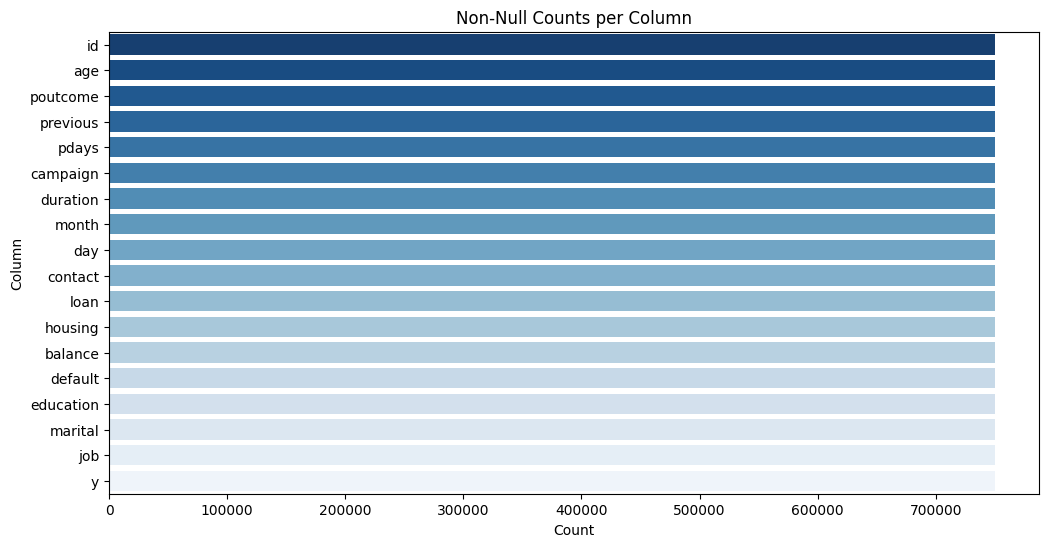

In [10]:
non_null_counts = train.notnull().sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=non_null_counts.values, y=non_null_counts.index, palette='Blues_r')
plt.title("Non-Null Counts per Column")
plt.xlabel("Count")
plt.ylabel("Column")
plt.show()


# Distribution and Description 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


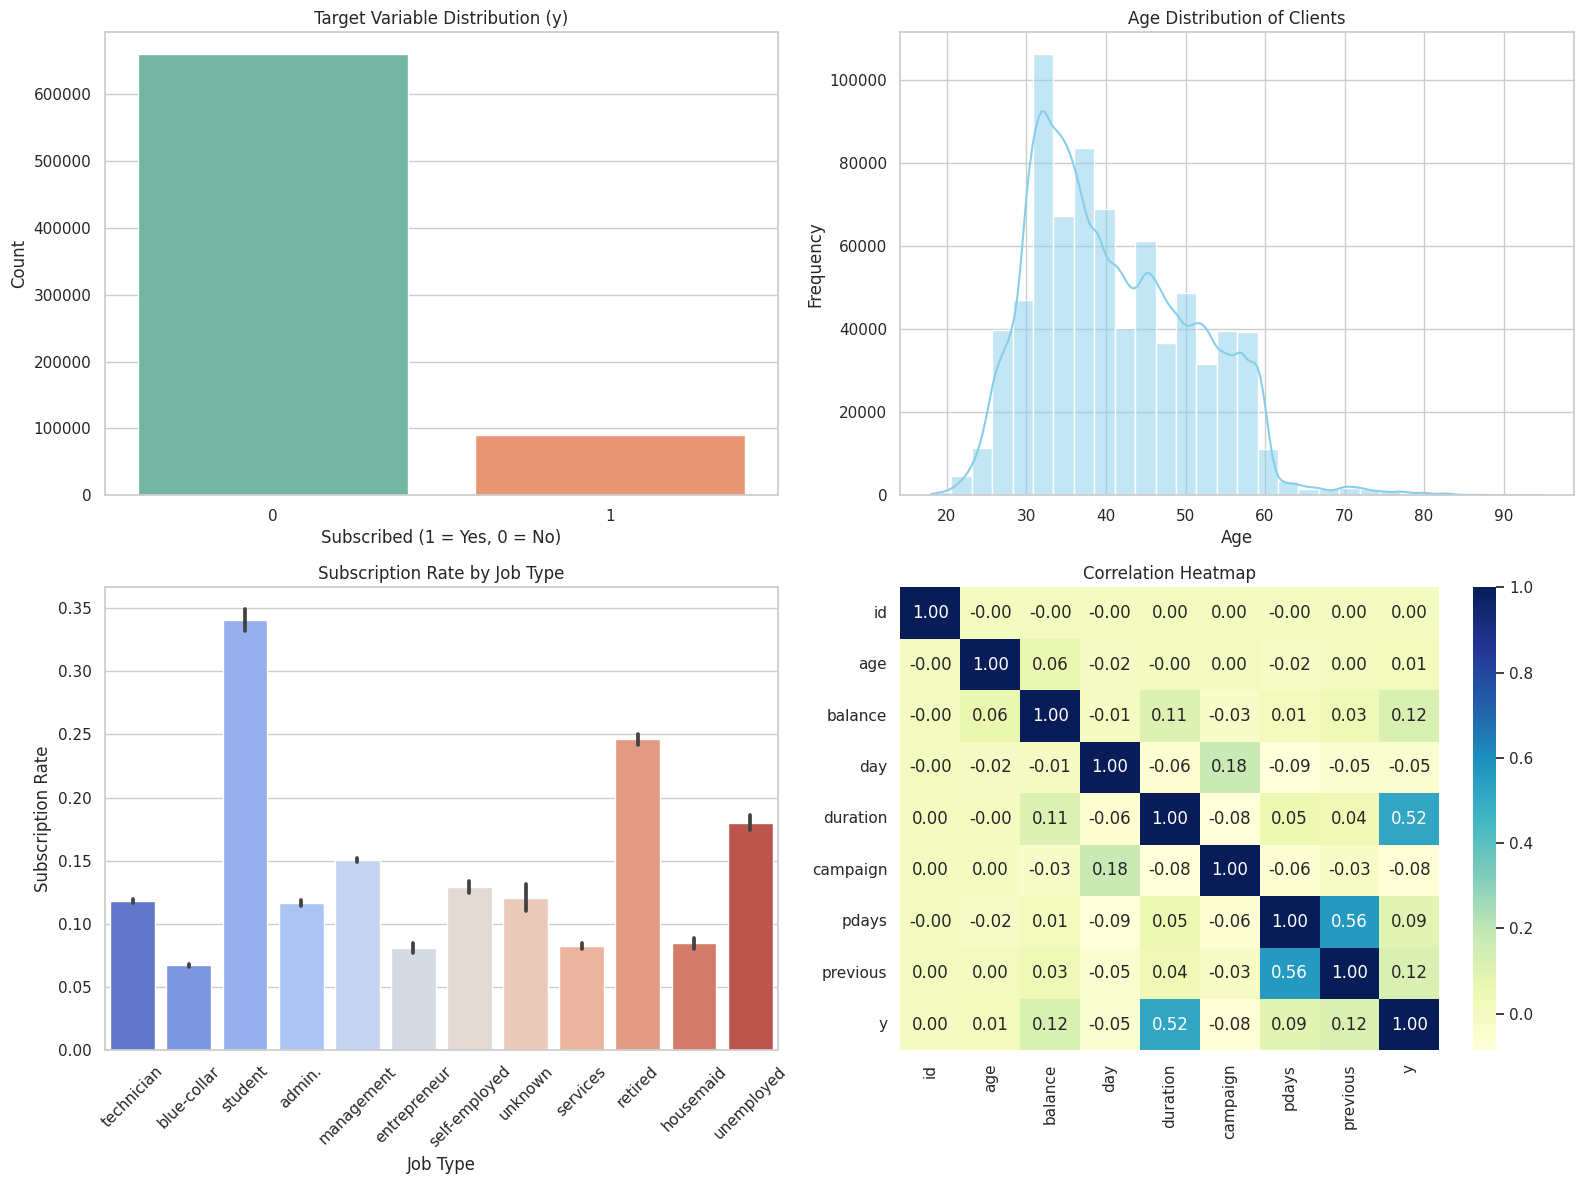

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

sns.set(style="whitegrid")

# Set up the figure
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Target Variable Distribution (Top-Left)
sns.countplot(x='y', data=train, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Target Variable Distribution (y)')
axs[0, 0].set_xlabel('Subscribed (1 = Yes, 0 = No)')
axs[0, 0].set_ylabel('Count')

# Plot 2: Age Distribution (Top-Right)
sns.histplot(train['age'], bins=30, kde=True, color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Age Distribution of Clients')
axs[0, 1].set_xlabel('Age')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Subscription Rate by Job Type (Bottom-Left)
sns.barplot(
    x='job', 
    y='y', 
    data=train, 
    estimator=lambda x: sum(x) / len(x), 
    palette='coolwarm', 
    ax=axs[1, 0]
)
axs[1, 0].set_title('Subscription Rate by Job Type')
axs[1, 0].set_xlabel('Job Type')
axs[1, 0].set_ylabel('Subscription Rate')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot 4: Correlation Heatmap (Bottom-Right)
numeric_cols = train.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f", ax=axs[1, 1])
axs[1, 1].set_title('Correlation Heatmap')

# Adjust layout
plt.tight_layout()
plt.show()


# Required EDA completed 🥳👀👀

In [12]:
train 



,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749995,749995,29,services,single,secondary,no,1282,no,yes,unknown,4,jul,1006,2,-1,0,unknown,1
749996,749996,69,retired,divorced,tertiary,no,631,no,no,cellular,19,aug,87,1,-1,0,unknown,0
749997,749997,50,blue-collar,married,secondary,no,217,yes,no,cellular,17,apr,113,1,-1,0,unknown,0
749998,749998,32,technician,married,secondary,no,-274,no,no,cellular,26,aug,108,6,-1,0,unknown,0


In [13]:
col = train.select_dtypes(include='object')
colT = test.select_dtypes(include='object')
le = LabelEncoder()
col.info()

for i in col.columns:
    col[i]= le.fit_transform(col[i])

for i in colT:
    colT[i] = le.fit_transform(colT[i])
    





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   job        750000 non-null  object
 1   marital    750000 non-null  object
 2   education  750000 non-null  object
 3   default    750000 non-null  object
 4   housing    750000 non-null  object
 5   loan       750000 non-null  object
 6   contact    750000 non-null  object
 7   month      750000 non-null  object
 8   poutcome   750000 non-null  object
dtypes: object(9)
memory usage: 51.5+ MB


# Encoding Completed 🥳🥳

In [14]:
colname = col.columns

train[colname] = col
test[colT.columns] = colT
train
test

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,1,1,1,0,1397,1,0,2,21,8,224,1,-1,0,3
1,750001,44,4,1,2,0,23,1,0,0,3,0,586,2,-1,0,3
2,750002,36,6,1,0,0,46,1,1,0,13,8,111,2,-1,0,3
3,750003,58,1,1,1,0,-1380,1,1,2,29,8,125,1,-1,0,3
4,750004,28,9,2,1,0,1950,1,0,0,22,5,181,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,999995,43,4,1,2,0,0,1,0,0,18,9,65,2,-1,0,3
249996,999996,40,7,1,3,0,522,1,0,0,19,9,531,1,189,1,0
249997,999997,63,5,1,0,0,33,0,0,0,3,5,178,1,92,8,2
249998,999998,50,1,1,0,0,2629,1,0,2,30,8,163,2,-1,0,3


# MODEL BUILDING >>>>>>>:)

### Starting Model preprocessing ⚙️

In [15]:
X= train.drop(columns=["y","id"])
y = train["y"]
X_train ,X_test , y_train , y_test = train_test_split(X,y,random_state=42)


In [16]:
xgbmodel = XGBClassifier(n_estimators=2700,
    learning_rate=3e-1,
    max_depth=5,
    subsample=0.93,
    colsample_bytree=0.76,
    objective='binary:logistic', eval_metric='auc', random_state=42)
xgbmodel.fit(X_train, y_train)

for i, j in xgbmodel.get_params().items():
    if j is not None:
        print(i, ":", j)

    

objective : binary:logistic
colsample_bytree : 0.76
enable_categorical : False
eval_metric : auc
learning_rate : 0.3
max_depth : 5
missing : nan
n_estimators : 2700
random_state : 42
subsample : 0.93


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

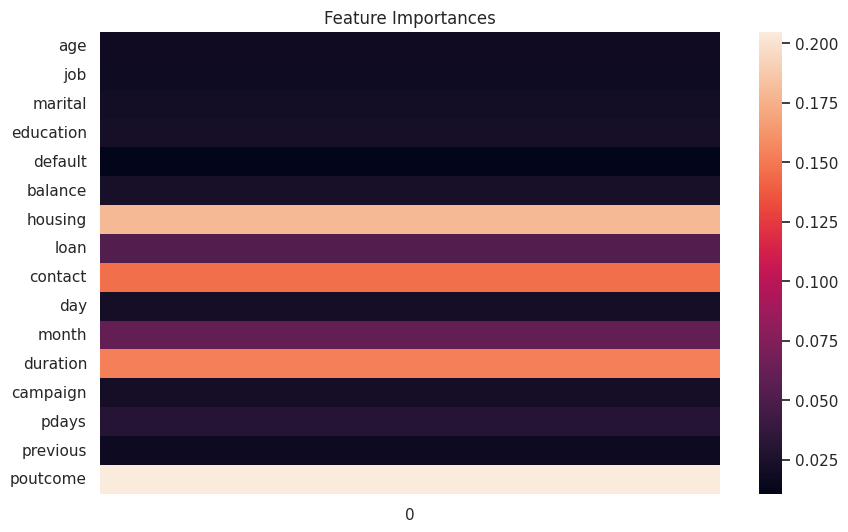

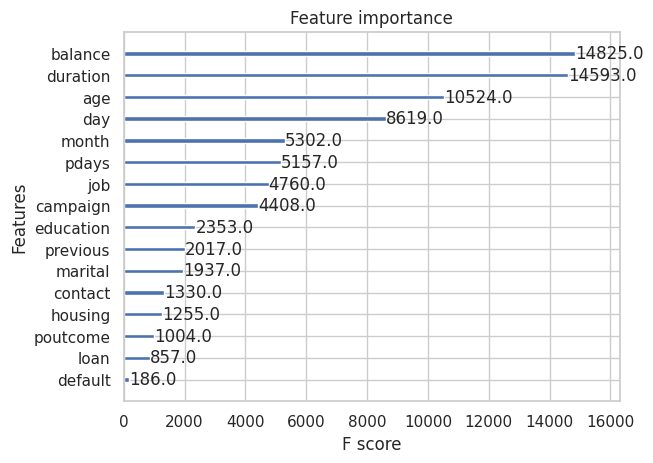

In [17]:
plt.figure(figsize=(10, 6))
sn.heatmap(pd.DataFrame(xgbmodel.feature_importances_, index=X_train.columns))
plt.title("Feature Importances")
plot_importance(xgbmodel)

In [18]:
y_pred = xgbmodel.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred[:, 1])
print(f"AUC: {auc:.4f}")

AUC: 0.9640


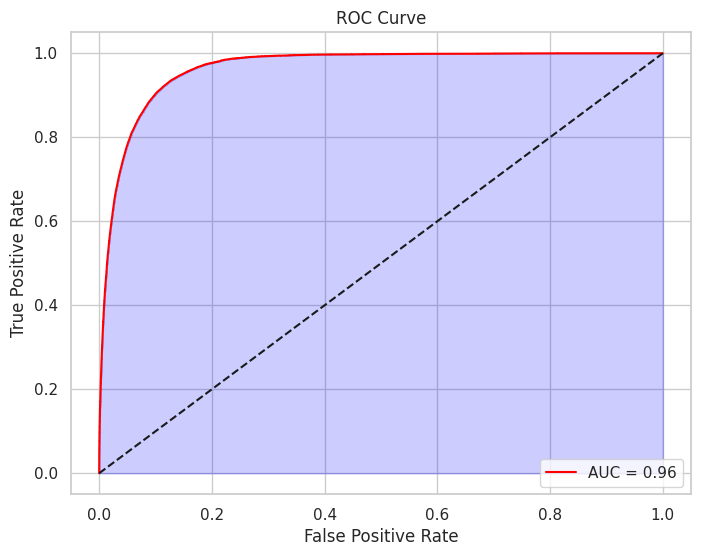

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:, 1])
auc_score = roc_auc_score(y_test, y_pred[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}", color='red')
plt.fill_between(fpr, tpr, color='blue', alpha=0.2) #ill under the curve
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

# Predict on test data 

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   id         250000 non-null  int64
 1   age        250000 non-null  int64
 2   job        250000 non-null  int64
 3   marital    250000 non-null  int64
 4   education  250000 non-null  int64
 5   default    250000 non-null  int64
 6   balance    250000 non-null  int64
 7   housing    250000 non-null  int64
 8   loan       250000 non-null  int64
 9   contact    250000 non-null  int64
 10  day        250000 non-null  int64
 11  month      250000 non-null  int64
 12  duration   250000 non-null  int64
 13  campaign   250000 non-null  int64
 14  pdays      250000 non-null  int64
 15  previous   250000 non-null  int64
 16  poutcome   250000 non-null  int64
dtypes: int64(17)
memory usage: 32.4 MB


In [21]:
x_test = test.drop(columns=["id"])
y_pred_proba = xgbmodel.predict_proba(x_test)[:, 1]  # class 1 probability


In [22]:
submission = pd.DataFrame({
    'id': test['id'],
    'y': y_pred_proba
})
submission.to_csv("submission.csv", index=False)
print("Yappie Yappiee model ")

Yappie Yappiee model 
